In [35]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.io.wavfile import read, write
sampling_rate, input_audio = wavfile.read('.\\HW2_Mix.wav')
is_out_exist = os.path.exists('output')
if not is_out_exist:
    # Create a new directory because it does not exist
    os.makedirs('output')
    print("The new directory is created!")

C:\Users\吳泊諭\AppData\Local\Temp\ipykernel_1108\1096173857.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, input_audio = wavfile.read('.\\HW2_Mix.wav')


In [36]:
def freq_spectrum(input_audio, f_sampling_rate, filename):
    F = np.fft.fft(input_audio)
    freqs = np.fft.fftfreq(len(F), 1/f_sampling_rate)
    #truncate negative frequencies
    F = F[freqs >= 0 ]
    freqs = freqs[freqs >= 0 ]
    #truncate frequencies above 1600 Hz
    F = F[freqs < 2000 ]
    freqs = freqs[freqs < 2000]
    plt.plot(freqs, np.abs(F))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.savefig('.\\output\\' + filename +'.png')
    plt.show()
def low_pass_filter(f_cutoff, f_sampling_rate, N, window_type):
    def window(ideal_filter, N, window_type):
        realistic_filter = ideal_filter.copy()
        if   window_type == 'rectangular':
            realistic_filter = ideal_filter.copy()
        elif window_type == 'hamming':
            realistic_filter = ideal_filter.copy()
        elif window_type == 'hanning':
            realistic_filter = ideal_filter.copy()
        elif window_type == 'blackman':
            for i in range(N):
                realistic_filter[i] = ideal_filter[i] * (0.42 - 0.5*np.cos(2*np.pi*i/(N-1)) + 0.08*np.cos(4*np.pi*i/(N-1)))
        return realistic_filter
    #normalize cutoff frequency
    my_filter = np.zeros((N,))
    f_cutoff = f_cutoff / f_sampling_rate
    mid = int(N/2)
    for i in range(-mid,mid):
        if i!=0:
            my_filter[mid+i] = np.sin(2*np.pi*f_cutoff*i)/(np.pi*i)
        else:
            my_filter[mid] = 2 * f_cutoff
    #convert ideal filter to low pass filter
    my_ideal_filter = window(my_filter, N, window_type)
    print(my_ideal_filter.shape)
    return my_ideal_filter
def masking(input_audio, my_filter, N):
    res = np.zeros(input_audio.shape)
    for i in range(input_audio.shape[0]):
        for j in range(N):
            if i-j >= 0:
                res[i] = res[i] + input_audio[i-j] * my_filter[j]
    return res

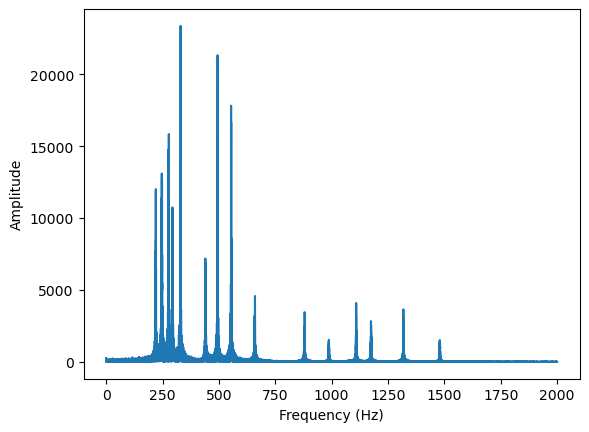

(800,)


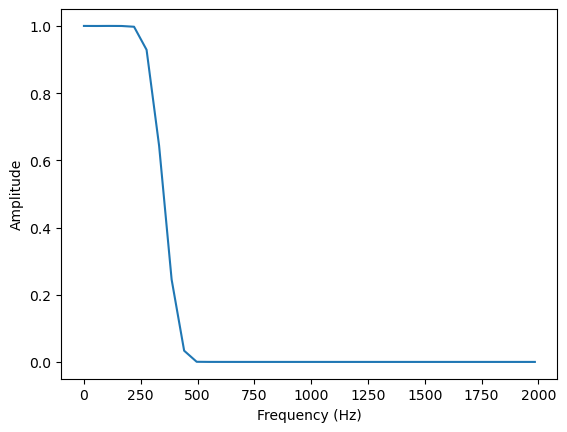

In [37]:
freq_spectrum(input_audio, sampling_rate, 'input')
my_low_pass_filter = low_pass_filter(350, sampling_rate, 800, 'blackman')
freq_spectrum(my_low_pass_filter, sampling_rate, 'filter')
res = masking(input_audio, my_low_pass_filter, 800)

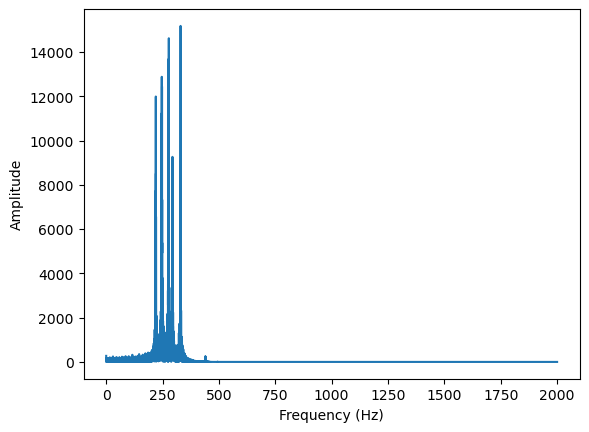

In [47]:
write(".\\output\\david_350.wav", sampling_rate , res)
freq_spectrum(res, sampling_rate, 'filter')

sedrtfsedrgaserfdszedf

In [50]:
import numpy as np
from scipy.io.wavfile import write
def video_saver(input, filename):
    rate = 44100
    data = input
    scaled = np.int16(data / np.max(np.abs(data)) * 32767)
    write(filename, rate, scaled)
rate = 44100
data = res
scaled = np.int16(data / np.max(np.abs(data)) * 32767)
write('test1234dfgdfgdf5.wav', rate, scaled)